In [1]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
import webbpsf
from webbpsf import roman

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

/data/bwedig/.conda/envs/dev/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
os.environ["WEBBPSF_PATH"] = "/data/bwedig/STScI/webbpsf-data"
os.environ["pandeia_refdata"] = "/data/bwedig/STScI/ref_data/pandeia_data-3.1_roman"

Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the ran

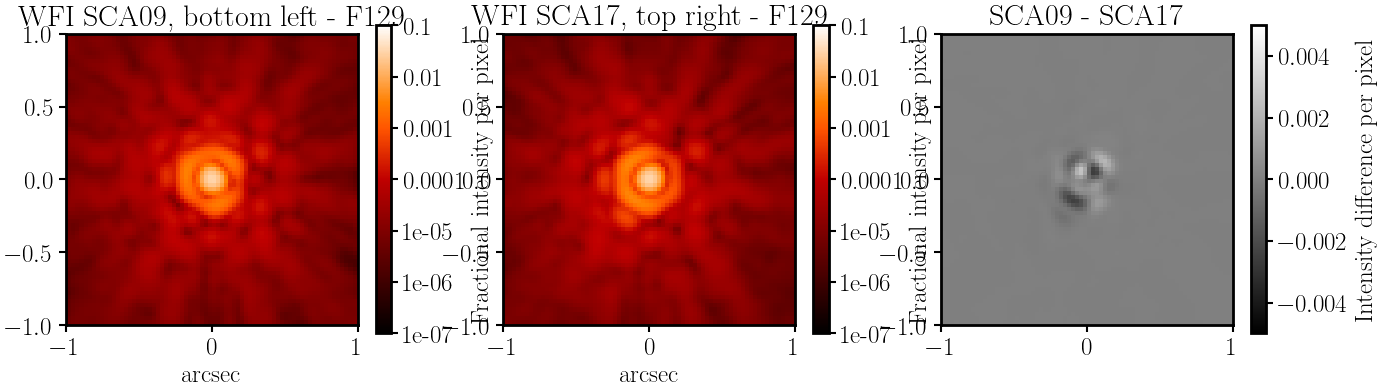

In [3]:
wfi = roman.WFI()
wfi.filter = 'F129'
wfi.detector = 'SCA09'
wfi.detector_position = (4, 4)
psf_sca09 = wfi.calc_psf()
wfi.detector = 'SCA17'
wfi.detector_position = (4092, 4092)
psf_sca17 = wfi.calc_psf()
fig, (ax_sca09, ax_sca17, ax_diff) = plt.subplots(1, 3, figsize=(16, 4))
webbpsf.display_psf(psf_sca09, ax=ax_sca09, imagecrop=2.0,
                        title='WFI SCA09, bottom left - F129')
webbpsf.display_psf(psf_sca17, ax=ax_sca17, imagecrop=2.0,
                        title='WFI SCA17, top right - F129')
webbpsf.display_psf_difference(psf_sca09, psf_sca17, ax=ax_diff,
                                    vmax=5e-3, title='SCA09 - SCA17', imagecrop=2.0)